## K-means to segment customer based on RFM

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Onlineretail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,203422.000000,203422.000000,150039.000000
mean,9.585684,4.877820,15240.234832
std,240.921315,113.686676,1717.658493
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13791.000000
50%,3.000000,2.100000,15061.000000
75%,10.000000,4.130000,16771.000000
max,74215.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203422 entries, 0 to 203421
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    203422 non-null  object 
 1   StockCode    203422 non-null  object 
 2   Description  202623 non-null  object 
 3   Quantity     203422 non-null  int64  
 4   InvoiceDate  203422 non-null  object 
 5   UnitPrice    203422 non-null  float64
 6   CustomerID   150039 non-null  float64
 7   Country      203422 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.4+ MB


In [6]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      799
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     53383
Country            0
dtype: int64

In [7]:
df.drop(columns=['Description'], inplace=True)
df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

In [8]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
17,539994,22830,-1,2011-01-04 10:09:00,0.00,NaN,United Kingdom
18,539995,85064,-12,2011-01-04 10:12:00,0.00,NaN,United Kingdom
19,539996,21784,-10,2011-01-04 10:12:00,0.00,NaN,United Kingdom
22,539999,20892,-1,2011-01-04 10:16:00,0.00,NaN,United Kingdom
23,540000,84499,-9,2011-01-04 10:17:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...
201945,C558531,22424,-1,2011-06-30 11:31:00,12.75,15039.0,United Kingdom
202318,C558553,23170,-576,2011-06-30 12:44:00,1.45,17949.0,United Kingdom
202427,C558559,20749,-1,2011-06-30 13:20:00,7.95,17648.0,United Kingdom
202627,C558575,22693,-24,2011-06-30 14:58:00,1.25,12674.0,France


In [9]:
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]


In [10]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     51973
Country            0
dtype: int64

In [11]:
len(df['InvoiceNo'].unique())

8100

In [12]:
df['InvoiceNo'].unique()

array(['539993', '540001', '540002', ..., '558635', '558636', '558637'],
      dtype=object)

In [13]:
df[df["InvoiceNo"]=='539993']

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom
5,539993,85099B,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
6,539993,20682,6,2011-01-04 10:00:00,3.25,13313.0,United Kingdom
7,539993,22961,12,2011-01-04 10:00:00,1.45,13313.0,United Kingdom
8,539993,22667,6,2011-01-04 10:00:00,2.95,13313.0,United Kingdom
9,539993,22898,8,2011-01-04 10:00:00,1.95,13313.0,United Kingdom


In [14]:
def fill_invoice(invoice_df):
    valid_customer_ids = invoice_df['CustomerID'].dropna()
    if not valid_customer_ids.empty:
        fill_value = valid_customer_ids.iloc[0]  # Lấy giá trị đầu tiên
        invoice_df['CustomerID'].fillna(fill_value, inplace=True)
    else:
        # Xử lý các InvoiceNo mà tất cả CustomerID đều bị thiếu
        invoice_df['CustomerID'].fillna('Unknown', inplace=True) # Ví dụ điền là Unknown
    return invoice_df
df = df.groupby('InvoiceNo').apply(fill_invoice)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18348\2692739157.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  invoice_df['CustomerID'].fillna(fill_value, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_18348\2692739157.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 198451 entries, ('539993', np.int64(0)) to ('558637', np.int64(203421))
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    198451 non-null  object 
 1   StockCode    198451 non-null  object 
 2   Quantity     198451 non-null  int64  
 3   InvoiceDate  198451 non-null  object 
 4   UnitPrice    198451 non-null  float64
 5   CustomerID   198451 non-null  object 
 6   Country      198451 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 17.6+ MB


In [16]:
df['Cost'] = df["Quantity"]*df['UnitPrice']

In [17]:
df.index = range(len(df))
df.index

RangeIndex(start=0, stop=198451, step=1)

In [18]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198451 entries, 0 to 198450
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    198451 non-null  object 
 1   StockCode    198451 non-null  object 
 2   Quantity     198451 non-null  int64  
 3   InvoiceDate  198451 non-null  object 
 4   UnitPrice    198451 non-null  float64
 5   CustomerID   198451 non-null  object 
 6   Country      198451 non-null  object 
 7   Cost         198451 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 12.1+ MB


In [20]:
df_invoice = df[['InvoiceNo',"Cost"]].groupby('InvoiceNo').sum()
df_invoice.describe()

,Cost
count,8100.000000
mean,494.163006
std,1347.592400
min,0.550000
25%,150.290000
50%,302.445000
75%,490.805000
max,77183.600000


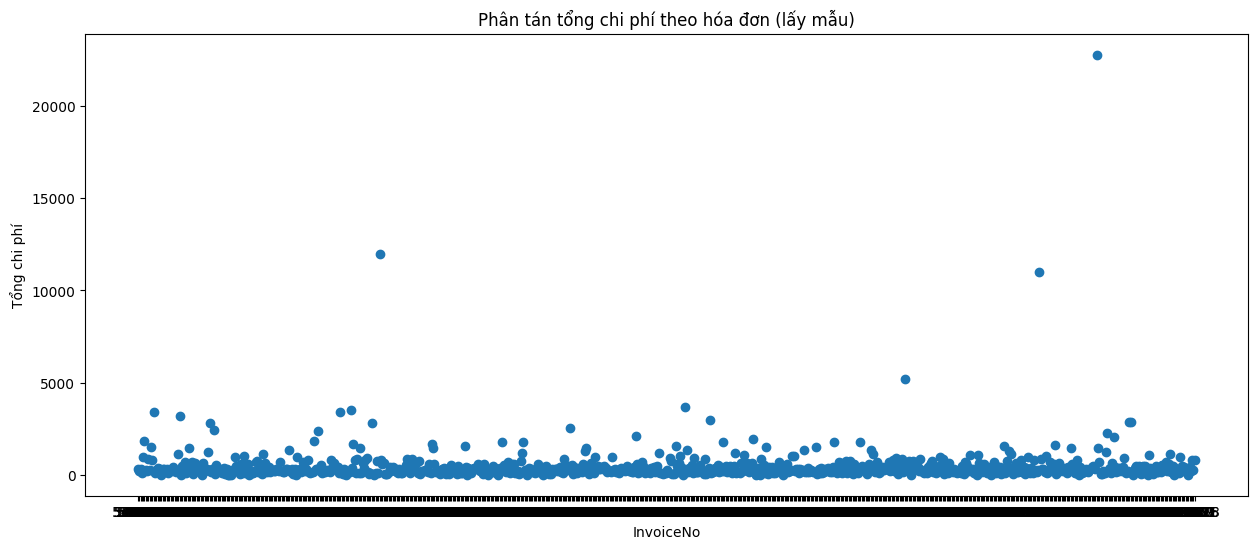

In [25]:
# Lấy mẫu dữ liệu (ví dụ: lấy mỗi 10 InvoiceNo)
df_sampled = df_invoice.iloc[::10]

plt.figure(figsize=(15, 6))
plt.scatter(df_sampled.index, df_sampled['Cost'])
plt.title('Phân tán tổng chi phí theo hóa đơn (lấy mẫu)')
plt.xlabel('InvoiceNo')
plt.ylabel('Tổng chi phí')
plt.show()

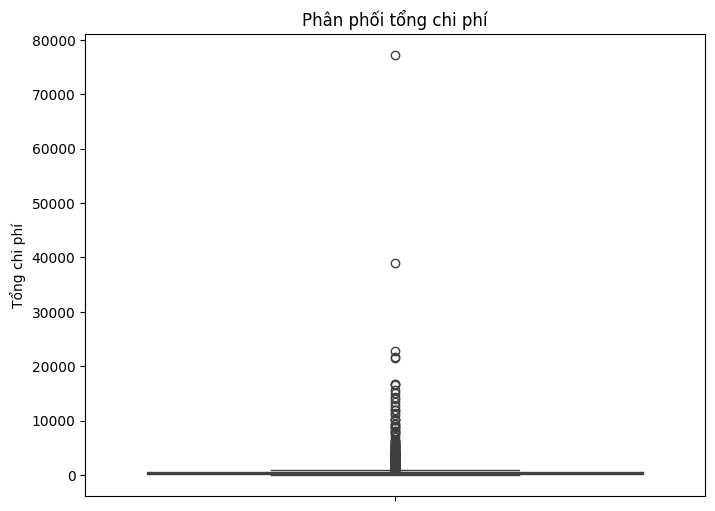

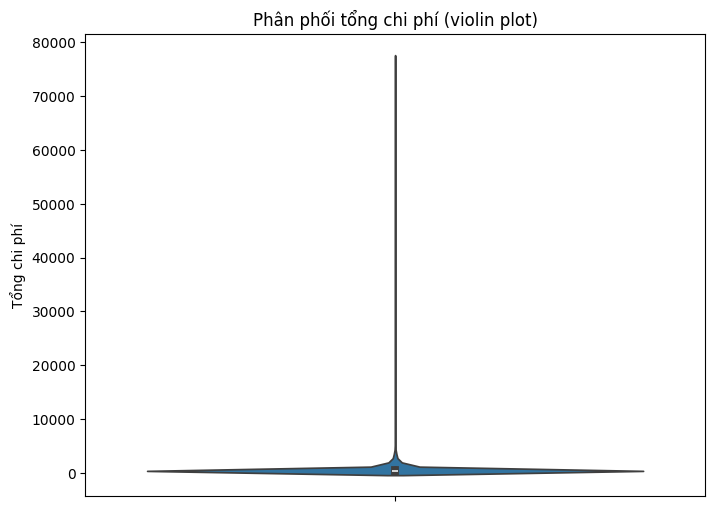

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_invoice['Cost'])
plt.title('Phân phối tổng chi phí')
plt.ylabel('Tổng chi phí')
plt.show()

# Hoặc sử dụng violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(y=df_invoice['Cost'])
plt.title('Phân phối tổng chi phí (violin plot)')
plt.ylabel('Tổng chi phí')
plt.show()

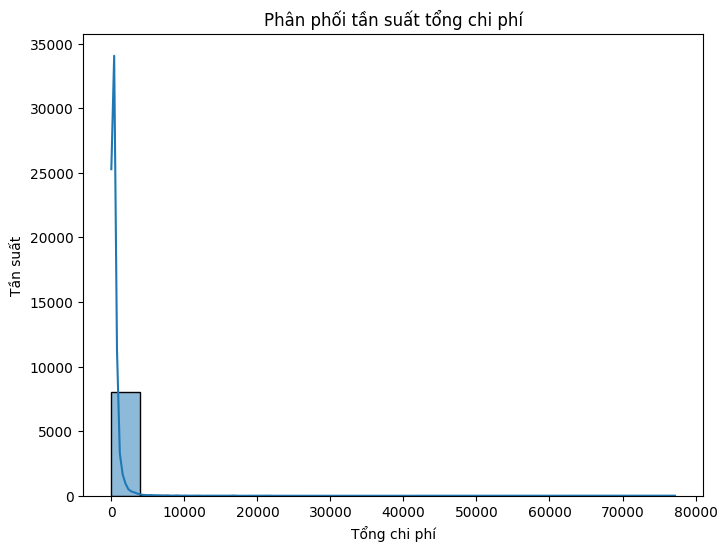

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df_invoice['Cost'], bins=20, kde=True)
plt.title('Phân phối tần suất tổng chi phí')
plt.xlabel('Tổng chi phí')
plt.ylabel('Tần suất')
plt.show()

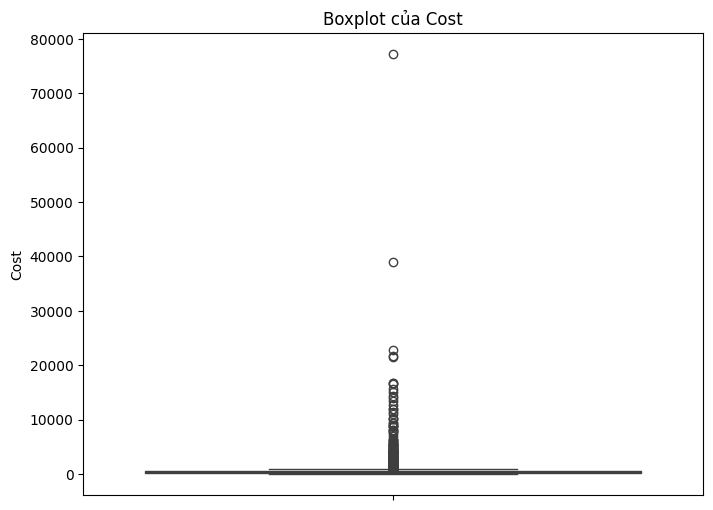

In [28]:
# Vẽ boxplot cho cột Cost
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_invoice['Cost'])
plt.title('Boxplot của Cost')
plt.ylabel('Cost')
plt.show()

In [30]:
# Xác định outliers
Q1 = df_invoice['Cost'].quantile(0.25)
Q3 = df_invoice['Cost'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_invoice[(df_invoice['Cost'] < lower_bound) | (df_invoice['Cost'] > upper_bound)]
print("Outliers:")
print(outliers)


Outliers:
              Cost
InvoiceNo         
540026     3900.62
540122     1179.60
540126     1209.10
540154     1854.39
540157     1145.33
...            ...
558536     1466.32
558540     2662.17
558552     1948.92
558554     2390.40
558614     2962.33

[694 rows x 1 columns]


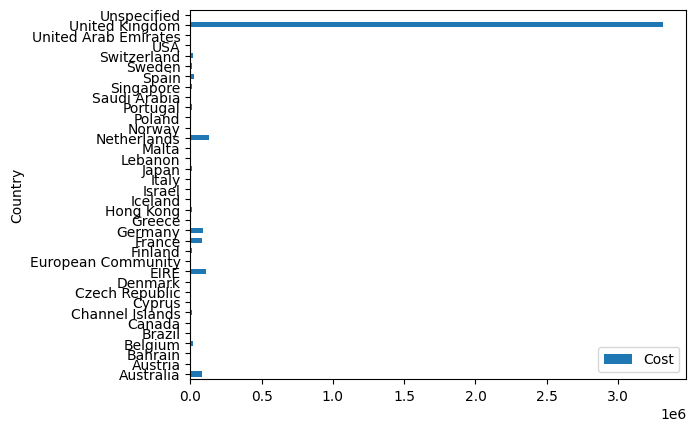

In [36]:
df[["Country",'Cost']].groupby('Country').sum().plot.barh();

In [39]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Kiểm tra kiểu dữ liệu của cột InvoiceDate
print(df['InvoiceDate'].dtype)

datetime64[ns]


In [40]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5


In [44]:
import datetime
now = datetime.datetime.now()
now - df['InvoiceDate'][0]

Timedelta('5195 days 23:24:26.280316')